In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                      na_values='?', comment='\t',
                      sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
# map number to string
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
# translate string to column with One-Hot True/False
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720.0,19.4,82,False,False,True


In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [8]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [9]:
normalizer = tf.keras.layers.Normalization(axis=-1)
type(normalizer)

keras.src.layers.preprocessing.normalization.Normalization

In [10]:
float_column = ["Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year"]
train_features[float_column]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
146,4,90.0,75.0,2125.0,14.5,74
282,4,140.0,88.0,2890.0,17.3,79
69,8,350.0,160.0,4456.0,13.5,72
378,4,105.0,63.0,2125.0,14.7,82
331,4,97.0,67.0,2145.0,18.0,80
...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79
229,8,400.0,180.0,4220.0,11.1,77
150,4,108.0,93.0,2391.0,15.5,74
145,4,83.0,61.0,2003.0,19.0,74


In [11]:
#train_features.tail()
#float_column = ["Acceleration", "Model Year"]
pp = np.array(train_features[float_column])
#print(pp)
normalizer.adapt( np.array(train_features[float_column]) )

In [12]:
print(normalizer.mean.numpy())

[[   5.477707  195.3185    104.869446 2990.252      15.559236   75.898094]]


In [13]:
train_features[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,False,False,True


## Regression with 1 input (y=mx+b)

In [17]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [20]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

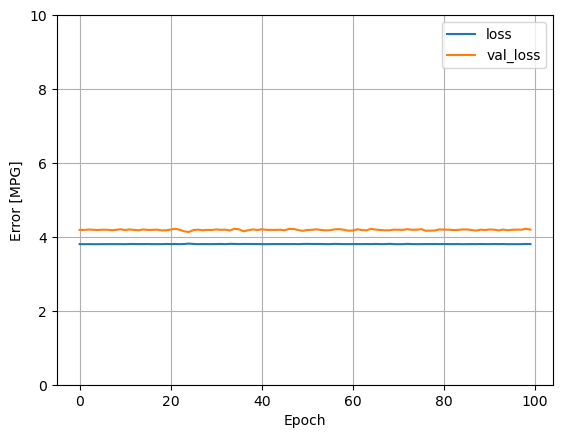

In [28]:
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [24]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0)

In [26]:
test_results

{'horsepower_model': 3.6712348461151123}

8/8 [==============================] - 0s 20ms/step


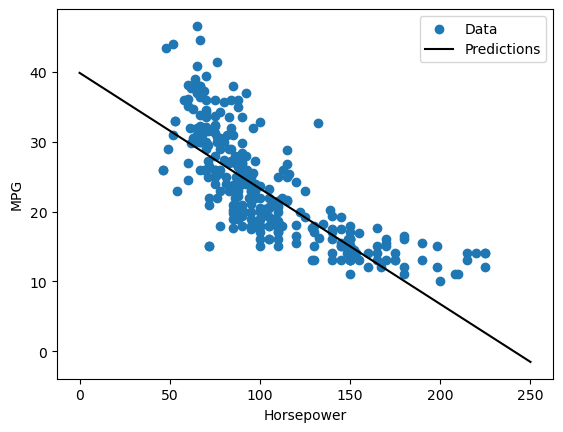

In [27]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()


x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

plot_horsepower(x, y)

## Multi-input regression

In [30]:
multi_feature = np.array(train_features[float_column])
multi_feature_normalizer = layers.Normalization(input_shape=[1,], axis=-1)
multi_feature_normalizer.adapt(multi_feature)
multi_feature_model = tf.keras.Sequential([
    multi_feature_normalizer,
    layers.Dense(units=1)
])

multi_feature_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 20 (84.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [31]:
multi_feature_model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Epoch 1/100
8/8 [==============================] - 2s 145ms/step - loss: 22.9333 - val_loss: 22.8597
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.0921 - val_loss: 22.0731
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.3018 - val_loss: 21.2729
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.4815 - val_loss: 20.4832
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 19.7048 - val_loss: 19.6892
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 18.8854 - val_loss: 18.9068
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 18.0834 - val_loss: 18.1158
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 17.2701 - val_loss: 17.3201
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 16.4746 - val_loss: 16.5324
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.7015 - val_loss: 15.7460
Epoch 1

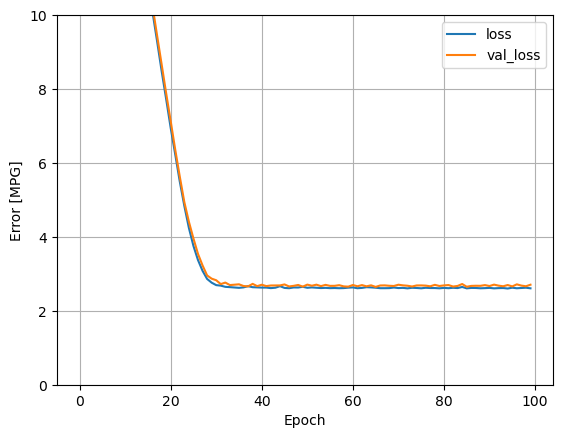

In [32]:
history_2 = multi_feature_model.fit(
    train_features[float_column],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

hist_2 = pd.DataFrame(history_2.history)
hist_2['epoch'] = history_2.epoch
hist_2.tail()

plot_loss(history_2)

In [35]:
test_results_2 = {}

test_results_2['multi_feature_model'] = multi_feature_model.evaluate(
    test_features[float_column],
    test_labels, verbose=0)
test_results_2

{'multi_feature_model': 2.495832681655884}